<a href="https://colab.research.google.com/github/KaustubhKhulbe/RoboticsMath/blob/main/Parametrized_Cubic_Spline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import time as tm

In [193]:
#input = [0., 90., 150., 210., 360.]
#output = [150., 120., 60., 120., 120.]

#input = np.array([0, 2, 4, 6, 8, 10, 12, 14])
#output = np.array([0, 9, 16, 36, 64, 123, 144, 140])

#input = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
#output = np.array([0, 6, 8, 10, 12, 14 ,15, 23, 28, 37])

#input = np.array([1, 4, 7, 10, 13])
#output = np.array([2, 8, 17,30, 34])

#input = np.array([1, 3, 5, 7, 9, 11, 13])
#output = np.array([1, 3, 6, 9, 13, 18, 27])

#input = np.array([0, 2, 4, 6, 8, 10])
#output = np.array([10, 2, 17, 28, 1, 13])

input = [0, 4, 8, 13, 10, 6.5, 15, 18, 15, 12, 15, 20]
output = [4, 4, 6, 4, 0, 3, 10, 16, 24, 20, 18, 25]

N = len(input)
n = N - 1

In [194]:
def getSpline(time, values):

  #a constant of polynomial
  a = [None] * N
  for i in range(0, len(time)):
    a[i] = (values[i])

  #b and d constants
  b = [None] * (n)
  d = [None] * (n)

  h = [None] * (n)
  for i in range(0, n): #[0, n-1]
    h[i] = time[i+1] - time[i]

  alpha = [None] * (n)
  for i in range(1, n): #[0, n-1]
   alpha[i] = (3/h[i]) * (a[i+1] - a[i]) - (3/h[i-1]) * (a[i] - a[i-1])

  c = [None] * N
  l = [None] * N
  u = [None] * N
  z = [None] * N

  l[0] = 1
  u[0] = 0
  z[0] = 0

  for i in range(1, n):
    l[i] = 2 * (time[i+1] - time[i-1]) - h[i-1] * u[i-1]
    u[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1]*z[i-1]) / l[i]

  l[n] = 1
  z[n] = 0
  c[n] = 0

  for j in range(n-1, -1, -1):
    c[j] = z[j] - u[j]*c[j+1]
    b[j] = (a[j+1]-a[j])/h[j] - (h[j] * (c[j+1] + 2*c[j]))/3
    d[j] = (c[j+1] - c[j])/(3*h[j])

  return a, b, c, d


In [195]:
time = [None] * len(input)
for i in range(0, len(time)):
  time[i] = i

ax, bx, cx, dx = getSpline(time, input)

ay, by, cy, dy = getSpline(time, output)

In [196]:
print(ax)
print(bx)
print(cx)
print(dx)
print()
print(ay)
print(by)
print(cy)
print(dy)

def graph():

  d_x = 0.01
  batch_size = (int)((time[1] - time[0]) / d_x)

  t_vals = []
  x_vals = []
  y_vals = []

  for i in range(0, n):
    num = time[i]
    while num < time[i+1]:

      t = num - time[i]
      
      num += d_x
      x = ax[i] + bx[i] * t + cx[i] * t**2 + dx[i] * t**3
      x_vals.append(x)

      y = ay[i] + by[i] * t + cy[i] * t**2 + dy[i] * t**3
      y_vals.append(y)
  plt.plot(x_vals, y_vals)

[0, 4, 8, 13, 10, 6.5, 15, 18, 15, 12, 15, 20]
[4.205068361432854, 3.5898632771342918, 5.43547853002998, 1.6682226027457903, -6.108368941013142, 3.265253161306773, 8.047356295786045, -0.954678344450957, -4.228642917982218, -0.13074998362017176, 4.751642852462906]
[0.0, -0.6152050842985626, 2.4608203371942503, -6.22807626447844, -1.5485152792804922, 10.922137381600407, -6.140034247121134, -2.8620003931158684, -0.4119641804153923, 4.509857114777438, 0.3725357213056405, 0]
[-0.2050683614328542, 1.0253418071642708, -2.89629886722423, 1.5598536617326493, 4.156884220293633, -5.687390542907181, 1.0926779513350886, 0.8166787375668254, 1.64060709839761, -1.3791071311572658, -0.12417857376854684]

[4, 4, 6, 4, 0, 3, 10, 16, 24, 20, 18, 25]
[-0.7549365259536159, 1.5098730519072319, 0.715444318324689, -4.371650325205987, -1.228843017500739, 6.287022395208944, 6.080753436664961, 8.389963858131212, 2.3593911308101907, -5.827528381371975, 2.9507223946777072]
[0.0, 2.2648095778608477, -3.0592383114433

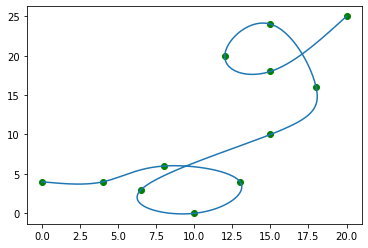

In [197]:
graph()
plt.scatter(input, output,c ='green')